In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

dengue = pd.read_csv('datasets\\dengue.csv')
dengue

FileNotFoundError: [Errno 2] No such file or directory: 'datasets\\dengue.csv'

In [ ]:
dengue.info

<bound method DataFrame.info of           Month  Year    Region  Dengue_Cases  Dengue_Deaths
0       January  2016  Region I           705              1
1      February  2016  Region I           374              0
2         March  2016  Region I           276              0
3         April  2016  Region I           240              2
4           May  2016  Region I           243              1
...         ...   ...       ...           ...            ...
1015     August  2020     BARMM            91              0
1016  September  2020     BARMM            16              8
1017    October  2020     BARMM            13              9
1018   November  2020     BARMM            15              1
1019   December  2020     BARMM            23              0

[1020 rows x 5 columns]>

In [ ]:
dengue['Year'] = dengue['Year'].astype('int64')

In [ ]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

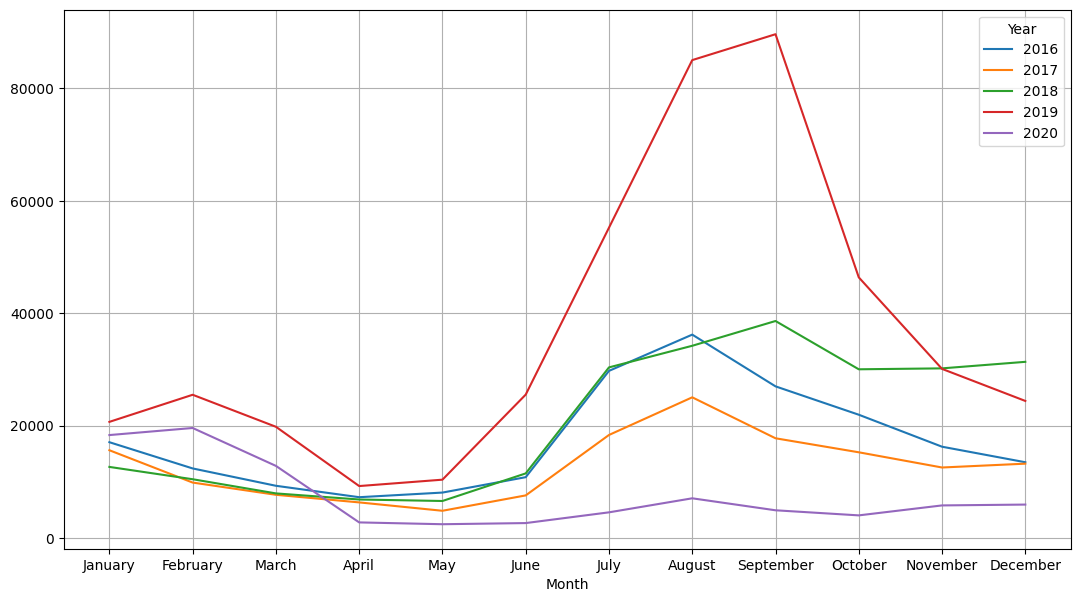

In [ ]:
month = ['January','February','March','April','May','June','July','August','September','October','November','December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month, ordered=True)

cases_month = dengue.groupby([dengue.Month, dengue.Year])['Dengue_Cases'].sum()
cases_month.unstack().plot()
plt.gcf().set_size_inches(13,7)
plt.grid(True)
plt.xticks(range(0,12), month)
plt.show()

In [ ]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

<h2>Total number of dengue cases and deaths per year</h2>

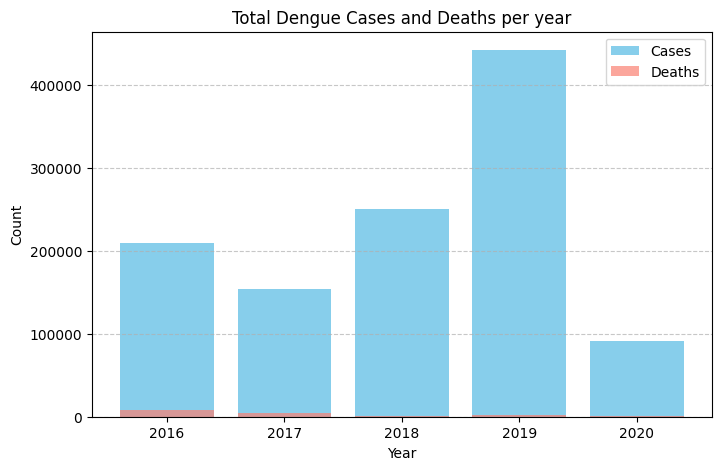

In [ ]:
yearly = dengue.groupby('Year')[['Dengue_Cases','Dengue_Deaths']].sum().reset_index()

plt.figure(figsize=(8,5))
plt.bar(yearly['Year'],yearly['Dengue_Cases'], label='Cases', color='skyblue')
plt.bar(yearly['Year'],yearly['Dengue_Deaths'],label='Deaths',color='salmon',alpha=0.7)
plt.title('Total Dengue Cases and Deaths per year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

<h2>Which region recorded the highest total dengue cases?<h2>

In [ ]:
region_cases = dengue.groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=True)

plt.figure(figsize=(8,5))
region_cases.plot(kind='barh', color='orange')
plt.title('Total Dengue Cases by Region')
plt.xlabel('Total Dengue Cases')
plt.ylabel('Region')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

<h2> What is the monthly trend of dengue cases across all years?<h2>

In [ ]:
monthly = dengue.groupby('Month')['Dengue_Cases'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=monthly, x='Month', y='Dengue_Cases', marker='o', color='green')
plt.title('Monthly Dengue Cases (All Years)')
plt.xlabel('Month')
plt.ylabel('Total Cases')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

<h2>Which month has the highest average dengue cases across all years?<h2>

In [ ]:
month_avg = dengue.groupby('Month')['Dengue_Cases'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=month_avg, x='Month', y='Dengue_Cases', color='skyblue')
plt.title('Average Dengue Cases per Month (Across Years)')
plt.xlabel('Month')
plt.ylabel('Average Cases')
plt.xticks(rotation=45)
plt.show()

<h2>Which regions show the highest dengue death rate (deaths per case)?<h2>

In [ ]:
dengue['Death_Rate'] = dengue['Dengue_Deaths'] / dengue['Dengue_Cases']
rate_region = dengue.groupby('Region')['Death_Rate'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
rate_region.plot(kind='bar', color='red', edgecolor='black')
plt.title('Average Dengue Death Rate per Region')
plt.xlabel('Region')
plt.ylabel('Death Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h2>What is the percentage contribution of each region to total dengue cases?<h2>

In [ ]:
region_share = dengue.groupby('Region')['Dengue_Cases'].sum()

plt.figure(figsize=(6,6))
plt.pie(region_share, labels=region_share.index, autopct='%1.1f%%', startangle=90)
plt.title('Share of Dengue Cases by Region')
plt.show()

<h2>Which month and region combination had the highest recorded dengue cases?<h2>

In [2]:
import pandas as pd

# Load the data into a pandas DataFrame
dengue = pd.read_csv('datasets\\dengue.csv')

max_row = dengue.loc[dengue['Dengue_Cases'].idxmax()]
print("Highest Dengue Case Record:")
print(max_row[['Month', 'Year', 'Region', 'Dengue_Cases', 'Dengue_Deaths']])

NameError: name 'dengue' is not defined